# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [6]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = (x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])  #area
    oczekiwane_n = intensity * a
    n = np.random.poisson(oczekiwane_n)
    
    x = sp.stats.uniform.rvs(loc=x_lim[0],scale = (x_lim[1]-x_lim[0]), size = n)
    y = sp.stats.uniform.rvs(loc=y_lim[0],scale = (y_lim[1]-y_lim[0]), size = n)
    
    homogenous_poisson_df = pd.DataFrame({"X": x, "Y": y})
    
    return homogenous_poisson_df

### Wczytanie danych
Załączone do notatniki pliki zawierają następujące procesy punktowe:
 - `points_HP` - jednorodny rozkład Poissona,
 - `points_R` - rozkład regularny z komponentem losowym,
 - `points_M` - rozkład Materna,

wygenerowane dla zakresu współrzędnych X $[10, 20]$ i Y $[-20, -10]$ oraz dane wykorzystywane w zawartych w notatniku automatycznych testach.

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [8]:
points_HP = pd.read_pickle('points_HP.pkl')
points_R = pd.read_pickle('points_R.pkl')
points_M = pd.read_pickle('points_M.pkl')

test_data_1 = pd.read_pickle('test_data_1.pkl')
test_data_2 = pd.read_pickle('test_data_2.pkl')

### Zadanie 1: Funkcja G (18 pkt)

#### a) Przygotowanie funkcji
Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona.

Algorytm postępowania:
- Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
- Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.
- Konstruujemy funkcję G jednorodnego rozkładu Poissona daną wzorem:<br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$<br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.
    
Uwagi do wykonania zadania:
- Generowane dane powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.
- Projektując funkcję `g_function()` uwzględnij fakt, że wiele punktów może mieć najbliższego sąsiada w takiej samej odległości.
- W procesie wyliczania dystansów do najbliższego sąsiada należy wykorzystać maksymalnie jedną pętlę `for` iterującą po kolejnych punktach, dla których wyliczamy dystans do ich najbliższego sąsiada. Nie należy korzystać z pętli `for` do wyliczania odległości pomiędzy poszczególnymi parami punktów.

In [10]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    #distances = sp.spatial.distance.cdist(points)
    distances = sp.spatial.distance.cdist(points,points)
    np.fill_diagonal(distances,np.inf)
    dmin_nuq = np.min(distances,1)
    dmin_uq = np.sort(np.append(np.unique(np.min(distances,1)),0))
    G = []
    for i in dmin_uq:
        G.append(sum(dmin_nuq<=i)/points.shape[0])
    g = pd.DataFrame({'D': dmin_uq, 'G': G})
    
    return g

def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    G = 1-np.exp(-intensity*np.pi*pow(d,2))
    g = pd.DataFrame({'D': d, 'G': G})
    
    return g

In [11]:
# Komórka testowa
test_results_1 = g_function(test_data_1)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (241, 2)
assert list(test_results_1.columns) == ["D", "G"]
assert np.isclose(test_results_1["D"].min(), 0.0)
assert np.isclose(test_results_1["D"].max(), 0.7588723960188973)
assert np.isclose(test_results_1["D"].mean(), 0.3050733863367381)
assert np.isclose(test_results_1["G"].min(), 0.0)
assert np.isclose(test_results_1["G"].max(), 1.0)
assert np.isclose(test_results_1["G"].mean(), 0.5474945047194762)

test_results_2 = g_function_poisson(np.linspace(0, np.max(test_results_1["D"]), 100), 2.5)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (100, 2)
assert list(test_results_2.columns) == ["D", "G"]
assert np.isclose(test_results_2["D"].min(), 0.0)
assert np.isclose(test_results_2["D"].max(), 0.7588723960188973)
assert np.isclose(test_results_2["D"].mean(), 0.37943619800944867)
assert np.isclose(test_results_2["G"].min(), 0.0)
assert np.isclose(test_results_2["G"].max(), 0.9891436854595927)
assert np.isclose(test_results_2["G"].mean(), 0.5834922748848472)

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. Ustaw identyczne zakresy osi wszystkich trzech wykresów funkcji G.

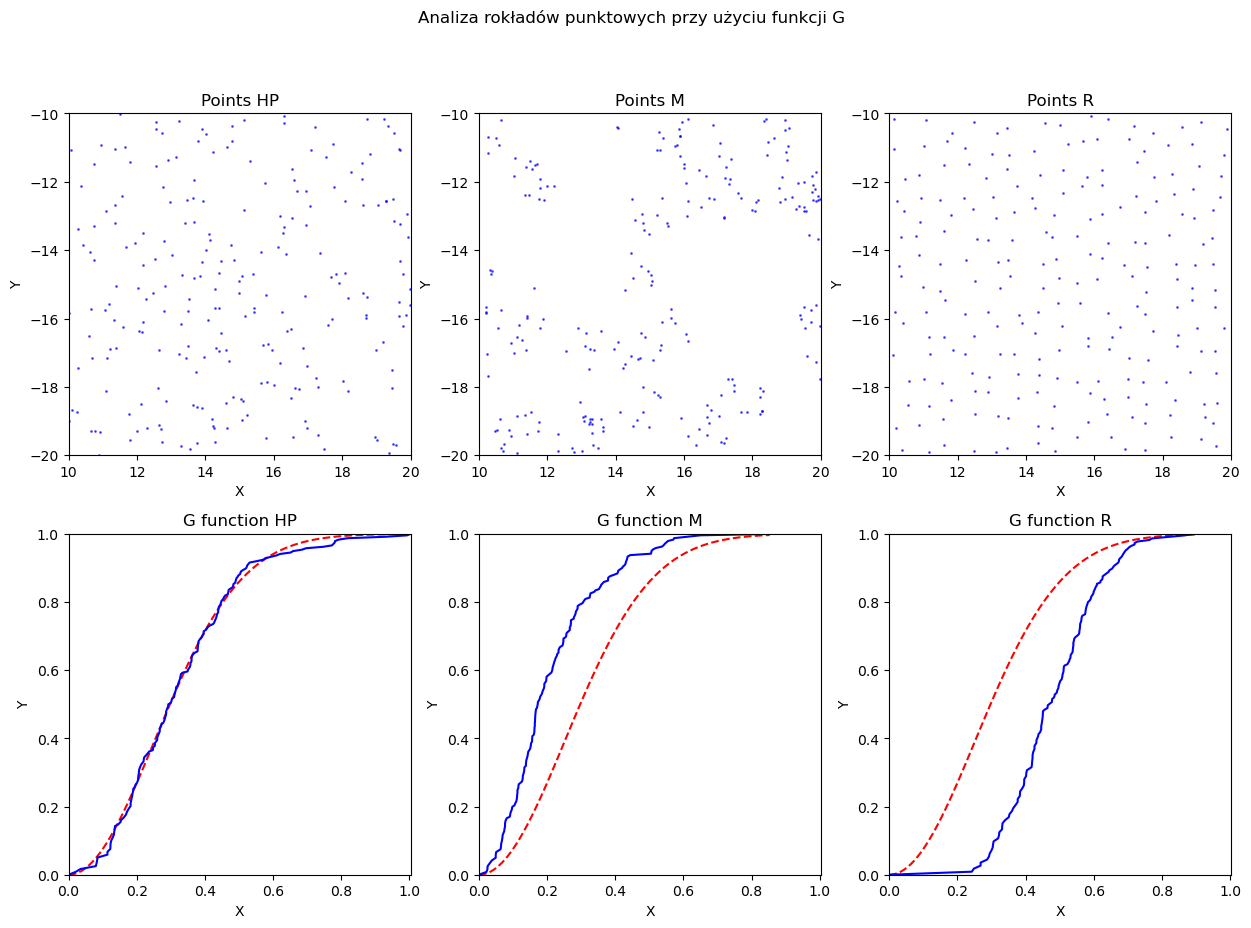

In [13]:
gf_HP = g_function(points_HP)
gf_M = g_function(points_M)
gf_R = g_function(points_R)
poiss_HP = g_function_poisson(np.linspace(0, np.max(gf_HP["D"]), 100), 2.5)
poiss_M = g_function_poisson(np.linspace(0, np.max(gf_M["D"]), 100), 2.5)
poiss_R = g_function_poisson(np.linspace(0, np.max(gf_R["D"]), 100), 2.5)


fig, axis = plt.subplots(2,3,figsize =(15,10), facecolor="white")

minx = 0
maxx = np.array([gf_HP.max(), gf_M.max(), gf_R.max()]).max()
miny = 0
maxy = 1

axis[0,0].scatter(data=points_HP, x="X", y="Y", color='blue', s=1, alpha=0.6)
axis[0,0].set_xlim(10, 20)
axis[0,0].set_ylim(-20,-10)
axis[0,0].set_aspect(1)
axis[0,0].set_title("Points HP")
axis[0,0].set_xlabel("X")
axis[0,0].set_ylabel("Y")

axis[0,1].scatter(data=points_M, x="X", y="Y", color='blue', s=1, alpha=0.6)
axis[0,1].set_xlim(10, 20)
axis[0,1].set_ylim(-20,-10)
axis[0,1].set_aspect(1)
axis[0,1].set_title("Points M")
axis[0,1].set_xlabel("X")
axis[0,1].set_ylabel("Y")

axis[0,2].scatter(data=points_R, x="X", y="Y", color='blue', s=1, alpha=0.6)
axis[0,2].set_xlim(10, 20)
axis[0,2].set_ylim(-20,-10)
axis[0,2].set_aspect(1)
axis[0,2].set_title("Points R")
axis[0,2].set_xlabel("X")
axis[0,2].set_ylabel("Y")

axis[1,0].plot(poiss_HP["D"],poiss_HP["G"], linestyle="dashed", color="red")
axis[1,0].plot(gf_HP["D"],gf_HP["G"], color="blue")
axis[1,0].set_xlim(minx, maxx)
axis[1,0].set_ylim(miny, maxy)
axis[1,0].set_aspect(1)
axis[1,0].set_title("G function HP")
axis[1,0].set_xlabel("X")
axis[1,0].set_ylabel("Y")

axis[1,1].plot(poiss_M["D"],poiss_M["G"], linestyle="dashed", color="red")
axis[1,1].plot(gf_M["D"],gf_M["G"], color="blue")
axis[1,1].set_xlim(minx, maxx)
axis[1,1].set_ylim(miny, maxy)
axis[1,1].set_aspect(1)
axis[1,1].set_title("G function M")
axis[1,1].set_xlabel("X")
axis[1,1].set_ylabel("Y")

axis[1,2].plot(poiss_R["D"],poiss_R["G"], linestyle="dashed", color="red")
axis[1,2].plot(gf_R["D"],gf_R["G"], color="blue")
axis[1,2].set_xlim(minx, maxx)
axis[1,2].set_ylim(miny, maxy)
axis[1,2].set_aspect(1)
axis[1,2].set_title("G function R")
axis[1,2].set_xlabel("X")
axis[1,2].set_ylabel("Y")

fig.suptitle("Analiza rokładów punktowych przy użyciu funkcji G")
plt.show()

### Zadanie 2: Funkcja F (18 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona.

Algorytm postępowania:
- Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy zestaw punktów pomiarowych dla tego samego zakresu współrzędnych, dla których został wygenerowany analizowany proces.
- Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
- Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
- Konstruujemy funkcję F jednorodnego rozkładu Poissona daną wzorem:<br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.
    
Uwagi do wykonania zadania:
- Generowane dane powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.
- Projektując funkcję `f_function()` uwzględnij fakt, że wiele punktów może mieć najbliższego sąsiada w takiej samej odległości.
- W procesie wyliczania dystansów do najbliższego sąsiada należy wykorzystać maksymalnie jedną pętlę `for` iterującą po kolejnych punktach, dla których wyliczamy dystans do ich najbliższego sąsiada. Nie należy korzystać z pętli `for` do wyliczania odległości pomiędzy poszczególnymi parami punktów.
- W części zadania dotyczącej generowania rozkładu pomiarowego nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `regular_on_rectangle()` lub `homogeneous_poisson_on_rectangle()`, którą można wkleić we wskazanej komórce na początku notatnika.

In [15]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    #print(np.shape(points))
    #print(np.shape(test_points))
    array_distances = sp.spatial.distance.cdist(points, test_points)
    #print(np.shape(array_distances))
    d_min = np.min(array_distances, axis=0)
    #print(np.shape(d_min))
    d_min.sort()
    #print(d_min)
    d_min_unique = np.unique(d_min)
    #print(np.size(d_min_unique))
    f_d = []
    for argument in d_min_unique:
        f_d = np.append(f_d, sum(d_min <= argument) / len(d_min))
    
    if d_min_unique[0] != 0:
        d_min_unique = np.insert(d_min_unique, 0, 0)
        f_d = np.insert(f_d, 0, 0)
    f = pd.DataFrame({"D":d_min_unique, "F":f_d})
    
    return f
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    f_d_p = 1 - np.exp((-1) * intensity * np.pi * np.square(d))
    f = pd.DataFrame({"D":d, "F":f_d_p})
    
    return f
    
#test_results_3 = f_function(test_data_1, test_data_2)
#f_function_poisson(np.linspace(0, np.max(test_results_3["D"]), 100), 2.5)

points_R.describe()

,X,Y
count,225.000000,225.000000
mean,14.991498,-15.012226
std,2.876724,2.900635
min,10.100456,-19.910573
25%,12.495583,-17.617887
50%,14.934621,-14.947805
75%,17.475461,-12.481247
max,19.880807,-10.089656


In [16]:
# Komórka testowa           
test_results_3 = f_function(test_data_1, test_data_2)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (361, 2)
assert list(test_results_3.columns) == ["D", "F"]
assert np.isclose(test_results_3["D"].min(), 0.0)
assert np.isclose(test_results_3["D"].max(), 0.9705949267845364)
assert np.isclose(test_results_3["D"].mean(), 0.28619986281302456)
assert np.isclose(test_results_3["F"].min(), 0.0)
assert np.isclose(test_results_3["F"].max(), 1.0)
assert np.isclose(test_results_3["F"].mean(), 0.5147368421052632)

test_results_4 = f_function_poisson(np.linspace(0, np.max(test_results_3["D"]), 100), 2.5)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (100, 2)
assert list(test_results_4.columns) == ["D", "F"]
assert np.isclose(test_results_4["D"].min(), 0.0)
assert np.isclose(test_results_4["D"].max(), 0.9705949267845364)
assert np.isclose(test_results_4["D"].mean(), 0.4852974633922682)
assert np.isclose(test_results_4["F"].min(), 0.0)
assert np.isclose(test_results_4["F"].max(), 0.9993880615391438)
assert np.isclose(test_results_4["F"].mean(), 0.6724855209770033)

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. Ustaw identyczne zakresy osi wszystkich trzech wykresów funkcji F.

Uwagi do wykonania zadania:
- Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

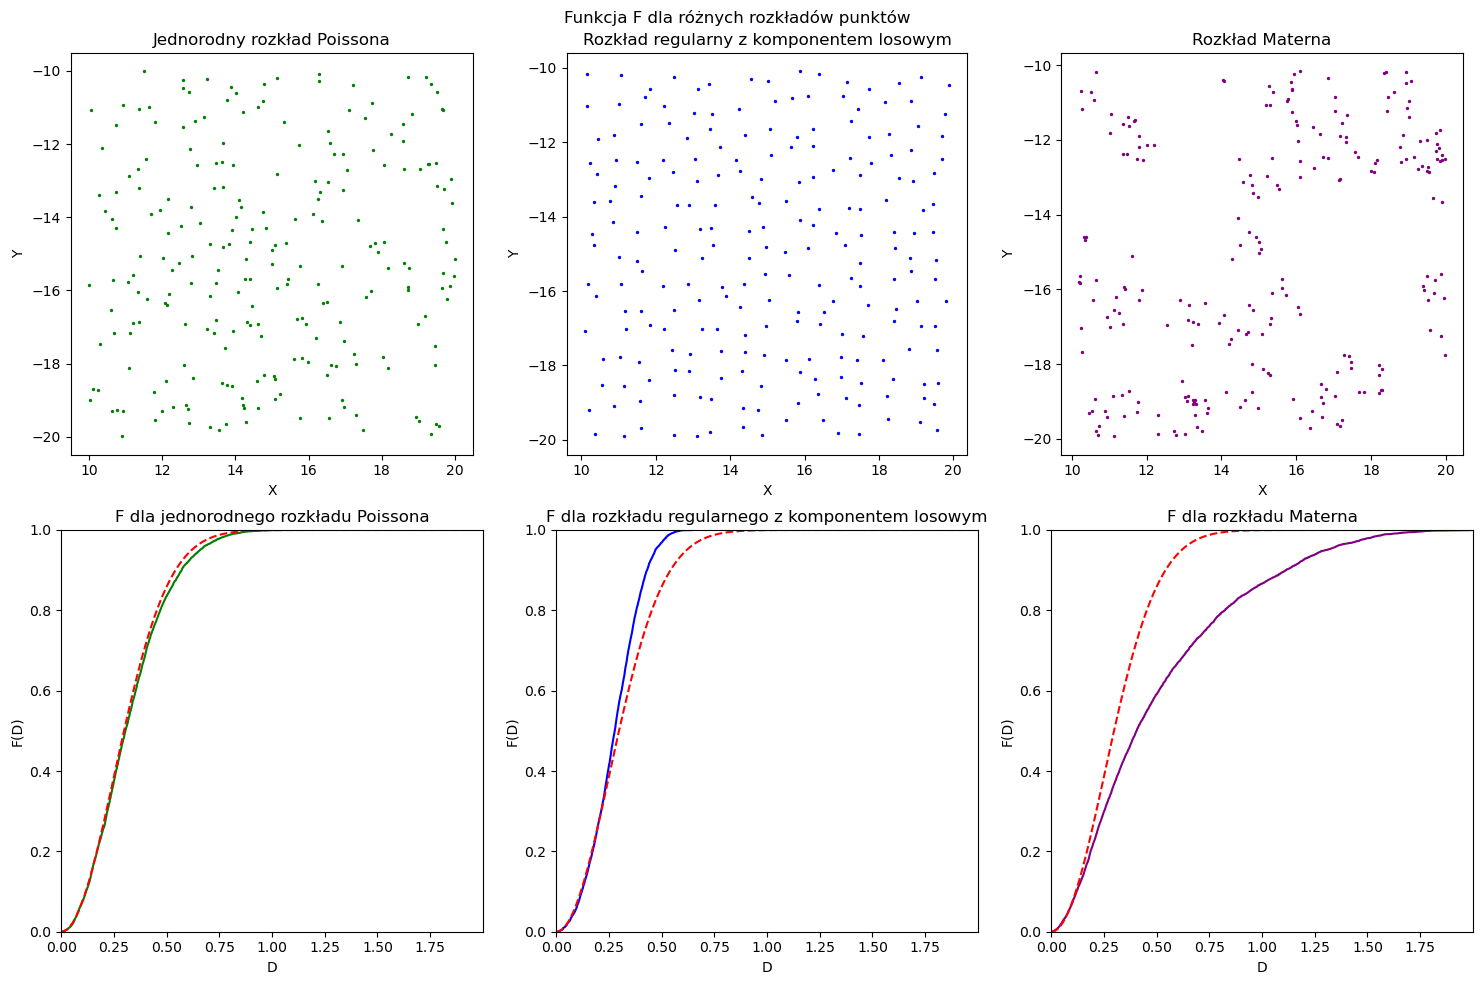

In [18]:
test_points = homogeneous_poisson_on_rectangle(50, [10,20], [-20,-10]) #trzeba chwilkę poczekać 

f_HP = f_function(points_HP, test_points)
f_R = f_function(points_R, test_points)
f_M = f_function(points_M, test_points)

d_values = np.linspace(0, max(f_HP['D'].max(), f_R['D'].max(), f_M['D'].max()), 150)
f_poisson = f_function_poisson(d_values, 2.5)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

axes[0].scatter(points_HP['X'], points_HP['Y'], s=2, color = "green")
axes[0].set_title("Jednorodny rozkład Poissona")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_aspect(1)

axes[1].scatter(points_R['X'], points_R['Y'], s=2, color = "blue")
axes[1].set_title("Rozkład regularny z komponentem losowym")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_aspect(1)

axes[2].scatter(points_M['X'], points_M['Y'], s=2, color = "purple")
axes[2].set_title("Rozkład Materna")
axes[2].set_xlabel("X")
axes[2].set_ylabel("Y")
axes[2].set_aspect(1)

axes[3].plot(f_HP["D"], f_HP["F"], color="green")
axes[3].plot(f_poisson["D"], f_poisson["F"], linestyle="dashed", color="red")
axes[3].set_title("F dla jednorodnego rozkładu Poissona")
axes[3].set_xlabel("D")
axes[3].set_ylabel("F(D)")
axes[3].set_xlim([0, d_values.max()])
axes[3].set_ylim([0, 1])

axes[4].plot(f_R["D"], f_R["F"], color="blue")
axes[4].plot(f_poisson["D"], f_poisson["F"], linestyle="dashed", color="red")
axes[4].set_title("F dla rozkładu regularnego z komponentem losowym")
axes[4].set_xlabel("D")
axes[4].set_ylabel("F(D)")
axes[4].set_xlim([0, d_values.max()])
axes[4].set_ylim([0, 1])

axes[5].plot(f_M["D"], f_M["F"], color="purple")
axes[5].plot(f_poisson["D"], f_poisson["F"], linestyle="dashed", color="red")
axes[5].set_title("F dla rozkładu Materna")
axes[5].set_xlabel("D")
axes[5].set_ylabel("F(D)")
axes[5].set_xlim([0, d_values.max()])
axes[5].set_ylim([0, 1])

fig.suptitle("Funkcja F dla różnych rozkładów punktów")
plt.tight_layout()
plt.show()